In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic.csv")
print(df.shape)
df.head()

(891, 12)


,Passenger Id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Passenger Id    891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,Passenger Id,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


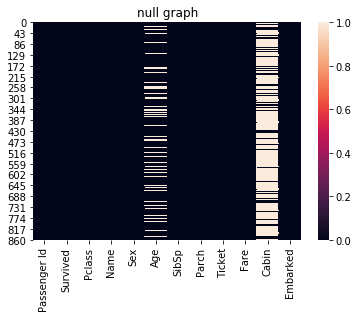

No of missing data


Passenger Id      0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

In [5]:
sns.heatmap(df.isnull())
plt.title("null graph")
plt.show()
print("No of missing data")
df.isnull().sum()

more null values are present in Cabin > Age > Embarked // so it have to treat

Treat the null values

In [6]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df["Embarked"]=df["Embarked"].fillna("S")

In [8]:
print("Still",round(df["Cabin"].isnull().sum()/len(df)*100),"%"+" of data is missing")

Still 77.0 % of data is missing


Due to lot of missing data in cabin cant treat it so have to leave the cabin column

In [9]:
df=df.drop("Cabin",axis=1)

In [10]:
df.isnull().sum()

Passenger Id    0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

To check correlation with survived

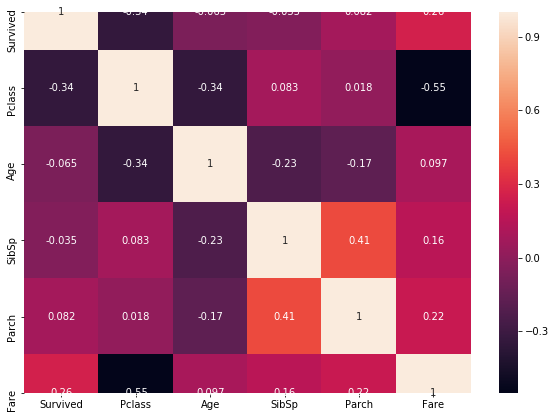

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop("Passenger Id",axis=1).corr(),annot=True)

In [12]:
l=["Passenger Id","Name","Ticket"]
for i in l:
    df=df.drop(i,axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
e=["Sex","Embarked"]
for i in e:
    df[i]=le.fit_transform(df[i])

To find outliers

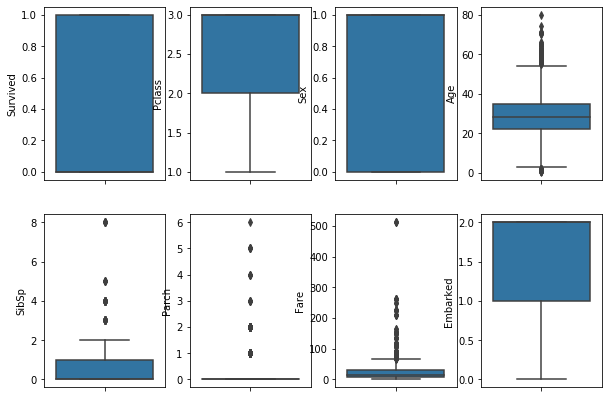

In [14]:
c=df.columns
plt.figure(figsize=(10,7))
for i in range(len(c)):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[c[i]],orient="v")

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

In [16]:
print(df.shape)
print(df1.shape)

(891, 8)
(820, 8)


In [17]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

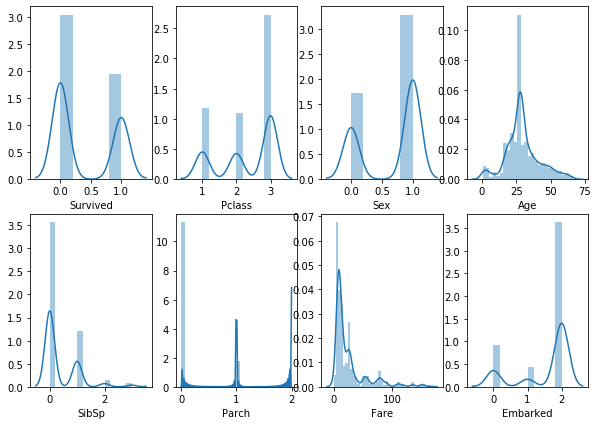

In [18]:
plt.figure(figsize=(10,7))
for i in range(len(c)):
    plt.subplot(2,4,i+1)
    sns.distplot(df1[c[i]])

In [19]:
df1.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [20]:
col=["SibSp","Parch","Fare"]
for i in col:
    df1[i]=np.cbrt(df1[i])
df1.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.018770
Parch       1.643259
Fare        0.708623
Embarked   -1.277386
dtype: float64

In [21]:
x=df1.iloc[:,1:]
y=df1["Survived"]
print(x.shape)
print(y.shape)

(820, 7)
(820,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

to find random state for high accuracy

In [23]:
macc=0
rand=0
for i in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(xtrain,ytrain)
    pred=LR.predict(xtest)
    acc=accuracy_score(ytest,pred)
    if acc>macc:
        macc=acc
        rand=i
print("rand_state : ",rand,"acc score : ",macc)
print("confusion matrix : ",confusion_matrix(ytest,pred))
print("classification Report : ",classification_report(ytest,pred))

rand_state :  14 acc score :  0.8719512195121951
confusion matrix :  [[81 13]
 [21 49]]
classification Report :                precision    recall  f1-score   support

           0       0.79      0.86      0.83        94
           1       0.79      0.70      0.74        70

    accuracy                           0.79       164
   macro avg       0.79      0.78      0.78       164
weighted avg       0.79      0.79      0.79       164



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [25]:
dtc=DecisionTreeClassifier()
svm=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()

In [26]:
mod_list=[dtc,svm,knn,nb]
for i in mod_list:
    i.fit(xtrain,ytrain)
    pred=i.predict(xtest)
    print("acc score of ",i,accuracy_score(ytest,pred))
    print("Confusion_matrix : \n",confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))

acc score of  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 0.7317073170731707
Confusion_matrix : 
 [[77 17]
 [27 43]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        94
           1       0.72      0.61      0.66        70

    accuracy                           0.73       164
   macro avg       0.73      0.72      0.72       164
weighted avg       0.73      0.73      0.73       164

acc score of  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, rand

In [27]:
from sklearn.model_selection import cross_val_score
cv_list=[dtc,svm,knn,nb,LR]
for i in cv_list:
    cvs=cross_val_score(i,x,y,cv=4).mean()
    print(cvs)

0.7573170731707317
0.7780487804878049
0.7585365853658537
0.7731707317073171
0.7878048780487805


Hyper Parameter Tuneing to improve accuracy score

In [65]:
from sklearn.model_selection import GridSearchCV
para={"criterion":["gini","entropy"], "max_depth":np.arange(2,11)}
gv=GridSearchCV(,para,cv=5)
gv.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 

In [66]:
gv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [67]:
gvpred=gv.predict(xtest)
accuracy_score(ytest,gvpred)

0.8100558659217877

Accuracy_Score increased by 4% due to GridSearchCV

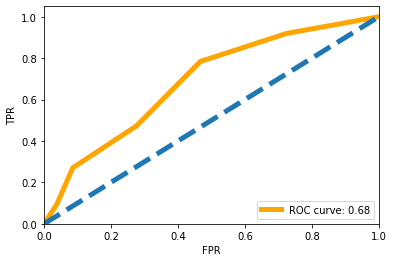

In [68]:
from sklearn.metrics import roc_curve, auc
pre=knn.predict_proba(xtest)[:,1]
fpr,tpr,thresholds=roc_curve(ytest,pre)#fpr,tpr,thresholds=roc_curve(pre,ytest) it shows continuous formet not support
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color="orange",lw=5,label="ROC curve: %.2f"%roc_auc)
plt.plot([0,1],[0,1],lw=5,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

In [69]:
import joblib
joblib.dump(dtc,"titanic.obj")

['titanic.obj']

In [70]:
v=joblib.load("titanic.obj")

In [71]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [80]:
l=np.array([1,0,38,1,1,71,2])
l=l.reshape(1,-1)

In [81]:
v.predict(l)

array([1], dtype=int64)